In [49]:
import numpy as np
import pandas as pd 
import altair as alt
import matplotlib.pyplot as plt

In [2]:
# Inputting data
df = pd.read_csv('SNAP_history_1969_2019.csv')

In [3]:
# Kaggle Food Access Data
# Original dataframe has a huge column number, so I handpicked the most relevant ones to our goal, creating dfK

df2 = pd.read_csv('Data Food Access 2019.csv')
dfK = df2.filter(['CensusTract', 'State', 'County', 'Urban', 'Pop2010', 'OHU2010', 'GroupQuartersFlag',
                'LowIncomeTracts', 'PovertyRate', 'MedianFamilyIncome' ], axis=1)

# Familiarizing with Data

## SNAP DATASET

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fiscal Year                 51 non-null     object 
 1   Average Participation       51 non-null     object 
 2   Average Benefit Per Person  51 non-null     float64
 3   Total Benefits(M)           51 non-null     object 
 4   Other Costs                 51 non-null     object 
 5   Total Costs(M)              51 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.5+ KB


In [5]:
df.describe()

,Average Benefit Per Person
count,51.000000
mean,69.163725
std,39.653545
min,6.630000
25%,39.330000
50%,69.000000
75%,95.465000
max,133.850000


In [6]:
df.shape

(51, 6)

In [7]:
df.head()

,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
0,1969,"2,878",6.63,228.80,21.70,250.50
1,1970,"4,340",10.55,549.70,27.20,576.90
2,1971,"9,368",13.55,"1,522.70",53.20,"1,575.90"
3,1972,"11,109",13.48,"1,797.30",69.40,"1,866.70"
4,1973,"12,166",14.60,"2,131.40",76.00,"2,207.40"


In [8]:
df.tail()

,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
46,2015,"45,767",126.81,"69,645.14","4,301.03","73,946.17"
47,2016,"44,220",125.40,"66,539.27","4,374.28","70,913.55"
48,2017,"42,317",125.47,"63,711.05","4,463.67","68,174.72"
49,2018,"40,776",124.50,"60,916.85","4,529.55","65,446.40"
50,2019,"35,703",129.83,"55,621.88","4,744.33","60,366.21"


In [9]:
df.columns

Index(['Fiscal Year', 'Average Participation', 'Average Benefit Per Person',
       'Total Benefits(M)', 'Other Costs', 'Total Costs(M)'],
      dtype='object')

In [10]:
print('COLUMN CLASSIFICATIONS:')
column_classifications = {}

for column in df.columns:
    if df[column].dtype == 'object':
        column_classifications[column] = 'Categorical'
    elif df[column].dtype == 'int64':
        column_classifications[column] = 'Discrete'
    elif df[column].dtype == 'float64':
        column_classifications[column] = 'Continuous'
    elif df[column].dtype == 'datetime64[ns]':
        column_classifications[column] = 'Ordinal'

for column, classification in column_classifications.items():
    print(f' - {column}: {classification}')

COLUMN CLASSIFICATIONS:
 - Fiscal Year: Categorical
 - Average Participation: Categorical
 - Average Benefit Per Person: Continuous
 - Total Benefits(M): Categorical
 - Other Costs: Categorical
 - Total Costs(M): Categorical


In [11]:
# Statistics per column
for column in df.columns:
    data_type = df[column].dtype
    
    # For quantitative data
    if data_type in ['int64', 'float64']:
        # Calculate descriptive statistics
        stats = df[column].describe()
        
        print(f"Statistics for {column}:")
        print(f" - Count: {stats['count']}")
        print(f" - Mean: {stats['mean']}")
        print(f" - Standard Deviation: {stats['std']}")
        print(f" - Minimum: {stats['min']}")
        print(f" - 25th Percentile: {stats['25%']}")
        print(f" - Median (50th Percentile): {stats['50%']}")
        print(f" - 75th Percentile: {stats['75%']}")
        print(f" - Maximum: {stats['max']}")
        print()

Statistics for Average Benefit Per Person:
 - Count: 51.0
 - Mean: 69.16372549019607
 - Standard Deviation: 39.653545009786164
 - Minimum: 6.63
 - 25th Percentile: 39.33
 - Median (50th Percentile): 69.0
 - 75th Percentile: 95.465
 - Maximum: 133.85



## KAGGLE FOOD ACCESS DATASET

In [12]:
# Column number, names, and types
dfK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CensusTract         72531 non-null  int64  
 1   State               72531 non-null  object 
 2   County              72531 non-null  object 
 3   Urban               72531 non-null  int64  
 4   Pop2010             72531 non-null  int64  
 5   OHU2010             72531 non-null  int64  
 6   GroupQuartersFlag   72531 non-null  int64  
 7   LowIncomeTracts     72531 non-null  int64  
 8   PovertyRate         72528 non-null  float64
 9   MedianFamilyIncome  71783 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 5.5+ MB


In [13]:
# Statistical info

dfK.describe()

,CensusTract,Urban,Pop2010,OHU2010,GroupQuartersFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome
count,7.253100e+04,72531.000000,72531.000000,72531.000000,72531.000000,72531.000000,72528.000000,71783.000000
mean,2.782573e+10,0.760626,4256.739022,1609.191821,0.007114,0.417573,15.183864,77037.792249
std,1.581647e+10,0.426704,1955.987626,725.676046,0.084046,0.493162,11.919903,37544.445885
min,1.001020e+09,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2499.000000
25%,1.212708e+10,1.000000,2899.000000,1108.000000,0.000000,0.000000,6.500000,51484.000000
50%,2.712979e+10,1.000000,4011.000000,1525.000000,0.000000,0.000000,12.000000,68821.000000
75%,4.103900e+10,1.000000,5330.500000,2021.000000,0.000000,1.000000,20.600000,93868.500000
max,5.604595e+10,1.000000,37452.000000,16043.000000,1.000000,1.000000,100.000000,250001.000000


In [14]:
# Sanity checks

dfK.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome
0,1001020100,Alabama,Autauga County,1,1912,693,0,0,11.3,81250.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,1,17.9,49000.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0,15.0,62609.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0,2.8,70607.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,0,15.2,96334.0


In [15]:
dfK.tail()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome
72526,56043000200,Wyoming,Washakie County,0,3326,1317,0,0,9.7,67254.0
72527,56043000301,Wyoming,Washakie County,1,2665,1154,0,0,11.6,64152.0
72528,56043000302,Wyoming,Washakie County,1,2542,1021,0,0,16.3,69605.0
72529,56045951100,Wyoming,Weston County,0,3314,1322,0,0,17.5,74500.0
72530,56045951300,Wyoming,Weston County,1,3894,1699,0,0,17.3,76838.0


In [16]:
dfK.columns

Index(['CensusTract', 'State', 'County', 'Urban', 'Pop2010', 'OHU2010',
       'GroupQuartersFlag', 'LowIncomeTracts', 'PovertyRate',
       'MedianFamilyIncome'],
      dtype='object')

In [17]:
print('COLUMN CLASSIFICATIONS:')
column_classifications = {}

for column in dfK.columns:
    if dfK[column].dtype == 'object':
        column_classifications[column] = 'Categorical'
    elif dfK[column].dtype == 'int64':
        column_classifications[column] = 'Discrete'
    elif dfK[column].dtype == 'float64':
        column_classifications[column] = 'Continuous'
    elif dfK[column].dtype == 'datetime64[ns]':
        column_classifications[column] = 'Ordinal'

for column, classification in column_classifications.items():
    print(f' - {column}: {classification}')

COLUMN CLASSIFICATIONS:
 - CensusTract: Discrete
 - State: Categorical
 - County: Categorical
 - Urban: Discrete
 - Pop2010: Discrete
 - OHU2010: Discrete
 - GroupQuartersFlag: Discrete
 - LowIncomeTracts: Discrete
 - PovertyRate: Continuous
 - MedianFamilyIncome: Continuous


In [18]:
# Statistics per column
for column in dfK.columns:
    data_type = dfK[column].dtype
    
    # For quantitative data
    if data_type in ['int64', 'float64']:
        stats = dfK[column].describe()
        
        print(f"Statistics for {column}:")
        print(f" - Count: {stats['count']}")
        print(f" - Mean: {stats['mean']}")
        print(f" - Standard Deviation: {stats['std']}")
        print(f" - Minimum: {stats['min']}")
        print(f" - 25th Percentile: {stats['25%']}")
        print(f" - Median (50th Percentile): {stats['50%']}")
        print(f" - 75th Percentile: {stats['75%']}")
        print(f" - Maximum: {stats['max']}")
        print()

Statistics for CensusTract:
 - Count: 72531.0
 - Mean: 27825725184.964565
 - Standard Deviation: 15816468002.020475
 - Minimum: 1001020100.0
 - 25th Percentile: 12127082604.5
 - Median (50th Percentile): 27129790500.0
 - 75th Percentile: 41039000351.0
 - Maximum: 56045951300.0

Statistics for Urban:
 - Count: 72531.0
 - Mean: 0.7606264907418897
 - Standard Deviation: 0.4267040457367971
 - Minimum: 0.0
 - 25th Percentile: 1.0
 - Median (50th Percentile): 1.0
 - 75th Percentile: 1.0
 - Maximum: 1.0

Statistics for Pop2010:
 - Count: 72531.0
 - Mean: 4256.739021935448
 - Standard Deviation: 1955.987626373357
 - Minimum: 1.0
 - 25th Percentile: 2899.0
 - Median (50th Percentile): 4011.0
 - 75th Percentile: 5330.5
 - Maximum: 37452.0

Statistics for OHU2010:
 - Count: 72531.0
 - Mean: 1609.191821428079
 - Standard Deviation: 725.6760462418302
 - Minimum: 0.0
 - 25th Percentile: 1108.0
 - Median (50th Percentile): 1525.0
 - 75th Percentile: 2021.0
 - Maximum: 16043.0

Statistics for GroupQua

In [19]:
for column in dfK.columns:
    data_type = dfK[column].dtype
    
    # For categorical data
    if data_type == 'object':
        # Find discrete values
        discrete_values = dfK[column].unique()
        print(f"Discrete values for {column}: {discrete_values}")
        
        # Find distribution and mode
        distribution = dfK[column].value_counts()
        mode = distribution.idxmax()
        print(f"Distribution of {column}:\n{distribution}")
        print(f"Mode of {column}: {mode}\n")

Discrete values for State: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
Distribution of State:
California              8024
Texas                   5238
New York                4870
Florida                 4182
Pennsylvania            3210
Illinois                3115
Ohio                    2943
Michigan                2756
North Carolina          2175
New Jersey              2002
Georgia                 1957
Virginia                18

# Data Wrangling

## SNAP DATASET

In [20]:
# Correcting possible typo
df.at[13, 'Fiscal Year'] = 1982

In [21]:
# Removing commas from data
df = df.replace(',','', regex = True)

In [22]:
# Checking data types
df.dtypes

Fiscal Year                    object
Average Participation          object
Average Benefit Per Person    float64
Total Benefits(M)              object
Other Costs                    object
Total Costs(M)                 object
dtype: object

In [23]:
# Converting all columns to numeric values
df = df.apply(pd.to_numeric)

In [24]:
# Converting Fiscal Year to date
df['Fiscal Year'] = pd.to_datetime(df['Fiscal Year'], format = '%Y' )

In [25]:
# Creating long dataframe for stacked bar chart
df2_snap = pd.melt(df, id_vars = 'Fiscal Year', value_vars = ['Total Benefits(M)', 'Other Costs'])

In [26]:
# Renaming columns in long dataframe
df2_snap.rename(columns = {'variable':'Category'}, inplace = True)

In [27]:
df2_snap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fiscal Year  102 non-null    datetime64[ns]
 1   Category     102 non-null    object        
 2   value        102 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.5+ KB


In [28]:
df2_snap.describe()

,value
count,102.000000
mean,13474.715196
std,20127.211967
min,21.700000
25%,1531.190000
50%,3968.555000
75%,16610.217500
max,76066.320000


In [29]:
df2_snap.columns

Index(['Fiscal Year', 'Category', 'value'], dtype='object')

## KAGGLE FOOD ACCESS DATASET

In [30]:
# Find number of missing values in each column

missing_dataK = dfK.isnull()
for column in missing_dataK.columns.values.tolist():
    print(column)
    print(missing_dataK[column].value_counts())
    print(' ')

CensusTract
False    72531
Name: CensusTract, dtype: int64
 
State
False    72531
Name: State, dtype: int64
 
County
False    72531
Name: County, dtype: int64
 
Urban
False    72531
Name: Urban, dtype: int64
 
Pop2010
False    72531
Name: Pop2010, dtype: int64
 
OHU2010
False    72531
Name: OHU2010, dtype: int64
 
GroupQuartersFlag
False    72531
Name: GroupQuartersFlag, dtype: int64
 
LowIncomeTracts
False    72531
Name: LowIncomeTracts, dtype: int64
 
PovertyRate
False    72528
True         3
Name: PovertyRate, dtype: int64
 
MedianFamilyIncome
False    71783
True       748
Name: MedianFamilyIncome, dtype: int64
 


In [31]:
# Find mean Poverty Rate, replace the 3 missing Poverty Rate values with that mean

mean_pov = dfK['PovertyRate'].astype('float').mean(axis = 0)
print(mean_pov)

dfK['PovertyRate'].replace(np.nan, mean_pov, inplace = True)
dfK.info()

15.18386416280609
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CensusTract         72531 non-null  int64  
 1   State               72531 non-null  object 
 2   County              72531 non-null  object 
 3   Urban               72531 non-null  int64  
 4   Pop2010             72531 non-null  int64  
 5   OHU2010             72531 non-null  int64  
 6   GroupQuartersFlag   72531 non-null  int64  
 7   LowIncomeTracts     72531 non-null  int64  
 8   PovertyRate         72531 non-null  float64
 9   MedianFamilyIncome  71783 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 5.5+ MB


In [32]:
# Find median Median Family Income, replace the 748 missing Family Income values with that median

med_in = dfK['MedianFamilyIncome'].astype('float').median(axis = 0)
print(med_in)

dfK['MedianFamilyIncome'].replace(np.nan, med_in, inplace = True)
dfK.info()

68821.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CensusTract         72531 non-null  int64  
 1   State               72531 non-null  object 
 2   County              72531 non-null  object 
 3   Urban               72531 non-null  int64  
 4   Pop2010             72531 non-null  int64  
 5   OHU2010             72531 non-null  int64  
 6   GroupQuartersFlag   72531 non-null  int64  
 7   LowIncomeTracts     72531 non-null  int64  
 8   PovertyRate         72531 non-null  float64
 9   MedianFamilyIncome  72531 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 5.5+ MB


In [33]:
# Drop duplicates, if same size as original there were no duplicates

dfK_nodup = dfK.drop_duplicates()
print(dfK.shape)
print(dfK_nodup.shape)

(72531, 10)
(72531, 10)


# Correlations & Linear Regression

In [34]:
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns

/Users/tanyaatrvash/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## SNAP DATASET

#### Average Participation and Total Benefits (M)

Average Participation vs Total Benefits (M):
Correlation coefficient = 0.963941829098735 
P-value = 7.909891469823231e-30

The intercept of Average Participation vs. Total Benefits(M) is:  -24790.43867735602
The slope of Average Participation vs. Total Benefits(M) is:  [2.03134966]


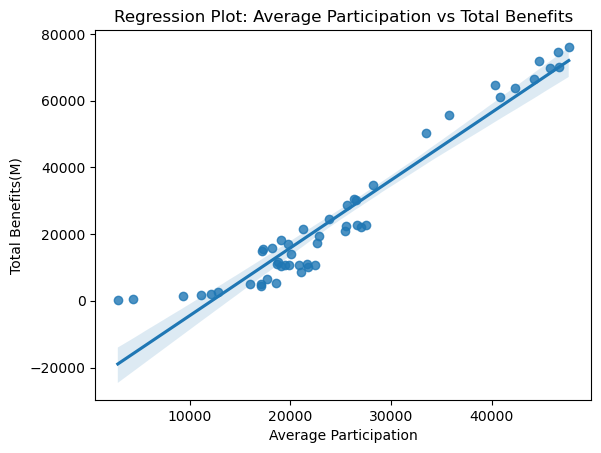

In [57]:
print('Average Participation vs Total Benefits (M):')
p_coef, p_val = stats.pearsonr(df['Average Participation'], df['Total Benefits(M)'])
print('Correlation coefficient =', p_coef, '\nP-value =', p_val)

lm = LinearRegression()

X = df[['Average Participation']]
Y = df['Total Benefits(M)']

lm.fit (X, Y)

Yhat = lm.predict(X)
Yhat[0:5]

# intercept
print('\nThe intercept of Average Participation vs. Total Benefits(M) is: ', lm.intercept_)

# slope
print('The slope of Average Participation vs. Total Benefits(M) is: ', lm.coef_)

# display the data graphically
sns.regplot(x = 'Average Participation', y = 'Total Benefits(M)', data = df)
plt.title('Regression Plot: Average Participation vs Total Benefits')
plt.show()

#### Average Participation and Average Benefit Per Person

Average Participation vs Average Benefit Per Person:
Correlation coefficient = 0.9113695813649612 
P-value = 1.591968115700338e-20

The intercept of Average Participation vs. Average Benefit Per Person is:  -11.122862189861152
The slope of Average Participation vs. Average Benefit Per Person is:  [0.00327103]


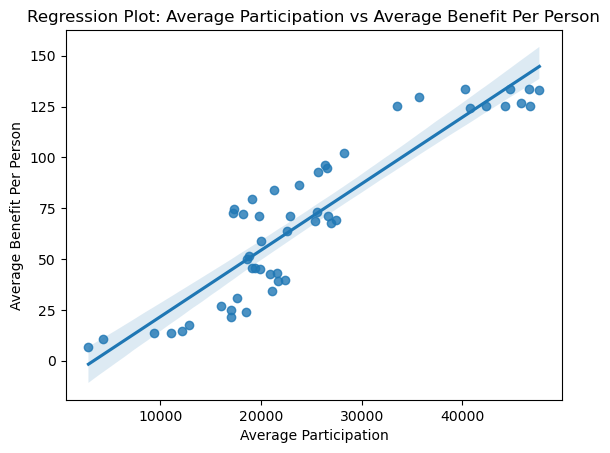

In [56]:
print('Average Participation vs Average Benefit Per Person:')
p_coef, p_val = stats.pearsonr(df['Average Participation'], df['Average Benefit Per Person'])
print('Correlation coefficient =', p_coef, '\nP-value =', p_val)

lm = LinearRegression()

X = df[['Average Participation']]
Y = df['Average Benefit Per Person']

lm.fit (X, Y)

Yhat = lm.predict(X)
Yhat[0:5]

# intercept
print('\nThe intercept of Average Participation vs. Average Benefit Per Person is: ', lm.intercept_)

# slope
print('The slope of Average Participation vs. Average Benefit Per Person is: ', lm.coef_)

# display the data graphically
sns.regplot(x = 'Average Participation', y = 'Average Benefit Per Person', data = df)
plt.title('Regression Plot: Average Participation vs Average Benefit Per Person')
plt.show()

#### Average Participation and Other Costs

Average Participation vs Other Costs:
Correlation coefficient = 0.888983738643004 
P-value = 3.041328672863334e-18

The intercept of Average Participation vs. Other Costs is:  -939.3404628774265
The slope of Average Participation vs. Other Costs is:  [0.11490411]


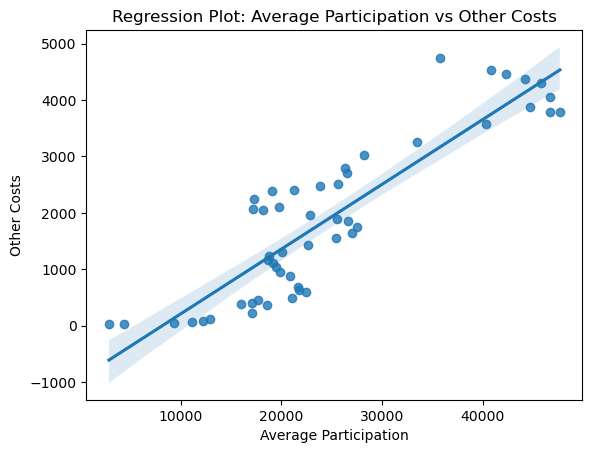

In [58]:
print('Average Participation vs Other Costs:')
p_coef, p_val = stats.pearsonr(df['Average Participation'], df['Other Costs'])
print('Correlation coefficient =', p_coef, '\nP-value =', p_val)

lm = LinearRegression()

X = df[['Average Participation']]
Y = df['Other Costs']

lm.fit (X, Y)

Yhat = lm.predict(X)
Yhat[0:5]

# intercept
print('\nThe intercept of Average Participation vs. Other Costs is: ', lm.intercept_)

# slope
print('The slope of Average Participation vs. Other Costs is: ', lm.coef_)

# display the data graphically
sns.regplot(x = 'Average Participation', y = 'Other Costs', data = df)
plt.title('Regression Plot: Average Participation vs Other Costs')
plt.show()

#### Average Participation and Total Costs(M)

Average Participation vs Total Costs(M):
Correlation coefficient = 0.9630679583251485 
P-value = 1.4080017403401601e-29

The intercept of Average Participation vs. Total Costs(M) is:  -25729.780250865213
The slope of Average Participation vs. Total Costs(M) is:  [2.1462538]


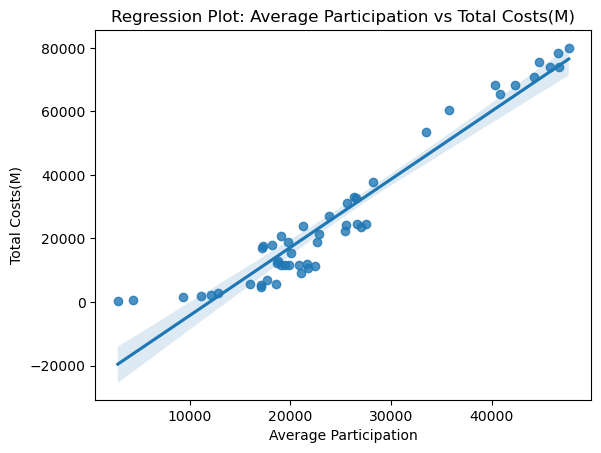

In [59]:
print('Average Participation vs Total Costs(M):')
p_coef, p_val = stats.pearsonr(df['Average Participation'], df['Total Costs(M)'])
print('Correlation coefficient =', p_coef, '\nP-value =', p_val)

lm = LinearRegression()

X = df[['Average Participation']]
Y = df['Total Costs(M)']

lm.fit (X, Y)

Yhat = lm.predict(X)
Yhat[0:5]

# intercept
print('\nThe intercept of Average Participation vs. Total Costs(M) is: ', lm.intercept_)

# slope
print('The slope of Average Participation vs. Total Costs(M) is: ', lm.coef_)

# display the data graphically
sns.regplot(x = 'Average Participation', y = 'Total Costs(M)', data = df)
plt.title('Regression Plot: Average Participation vs Total Costs(M)')
plt.show()

### KAGGLE FOOD ACCESS DATASET

In [39]:
# Correlate every column with every column

dfK[["LowIncomeTracts", "MedianFamilyIncome", "Pop2010", "OHU2010", 
     "LowIncomeTracts", "PovertyRate"]].corr()

,LowIncomeTracts,MedianFamilyIncome,Pop2010,OHU2010,LowIncomeTracts,PovertyRate
LowIncomeTracts,1.000000,-0.625876,-0.122379,-0.166781,1.000000,0.693983
MedianFamilyIncome,-0.625876,1.000000,0.108271,0.137656,-0.625876,-0.633772
Pop2010,-0.122379,0.108271,1.000000,0.897393,-0.122379,-0.142209
OHU2010,-0.166781,0.137656,0.897393,1.000000,-0.166781,-0.190724
LowIncomeTracts,1.000000,-0.625876,-0.122379,-0.166781,1.000000,0.693983
PovertyRate,0.693983,-0.633772,-0.142209,-0.190724,0.693983,1.000000


<AxesSubplot:xlabel='Pop2010', ylabel='PovertyRate'>

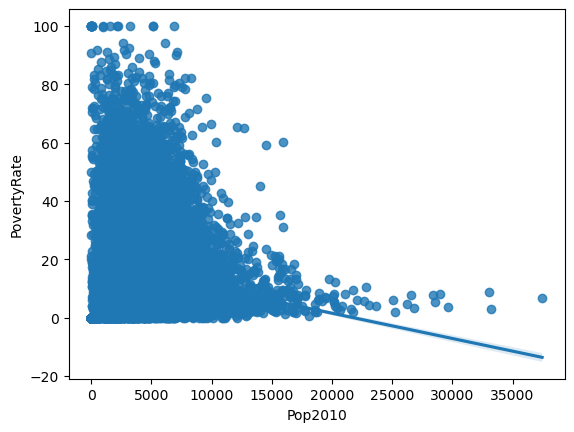

In [40]:
# There are no very strong correlations in this dataset. Let's explore further:
# Plotting Region Population in 2012 against Poverty Rate in the area

sns.regplot(x="Pop2010", y="PovertyRate", data=dfK)

<AxesSubplot:xlabel='Pop2010', ylabel='PovertyRate'>

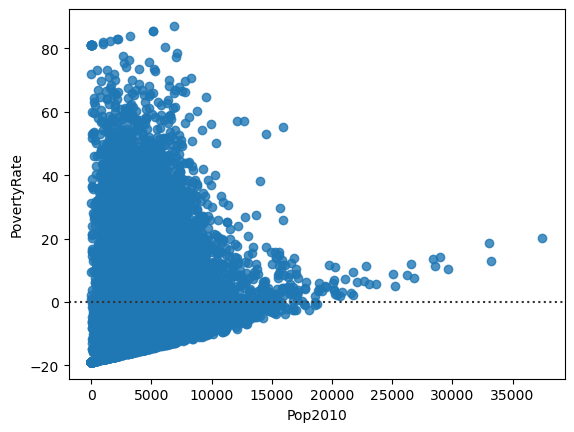

In [41]:
# Residual plot: is it a good fit, are there randomly scattered points? NO

sns.residplot(x = dfK['Pop2010'], y = dfK['PovertyRate'])

In [42]:
# We are struggling to find a clear linear relationship from this ^ data,
# however we plan to use this data to constructive an interactive map of the USA.

# Visualizations

In [43]:
snap_par_per_year = alt.Chart(df).mark_line(point = True).encode(
    x = 'Fiscal Year',
    y = 'Average Participation',
    tooltip = ['Fiscal Year', 'Average Participation']
).properties(
    title = 'SNAP Participation from 1969 - 2019',
    width = 600
)

snap_par_per_year

alt.Chart(...)

In [44]:
bar = alt.Chart(df).mark_bar(color = 'green').encode(
    x = 'Fiscal Year',
    y = alt.Y('Total Costs(M)', title = 'Millions'),
    tooltip = ['Fiscal Year', 'Total Costs(M)']
).properties(
    title = 'Total Cost of SNAP with Rolling Mean from 1969 - 2019'
)

line = alt.Chart(df).mark_line(color = 'purple').transform_window(
    rolling_mean = 'mean(Total Costs(M))',
    frame = [-9,0],
    ).encode(
        x = 'Fiscal Year',
        y = 'rolling_mean:Q'
)


(bar + line).properties(
    width = 600
)

alt.LayerChart(...)

In [45]:
alt.Chart(df2_snap).mark_bar().encode(
    x = 'Fiscal Year',
    y = alt.Y('sum(value)', title = 'Total Cost in Millions'),
    color = 'Category',
    tooltip = ['Fiscal Year', 'sum(value)']
).properties(
    title = 'Total Costs by Category',
    width = 600
)

alt.Chart(...)

In [46]:
alt.Chart(df).mark_bar(point = True).encode(
    x = 'Fiscal Year',
    y = alt.Y('Other Costs', title = 'Cost in Millions'),
    tooltip = ['Fiscal Year', 'Other Costs']
).properties(
    title = 'Other Costs',
    width = 600
)

alt.Chart(...)